In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, TransformerMixin


Full dataset class distribution:
label
1    119341
0     56000
Name: count, dtype: int64

Percentage distribution:
label
1    68.062233
0    31.937767
Name: proportion, dtype: float64


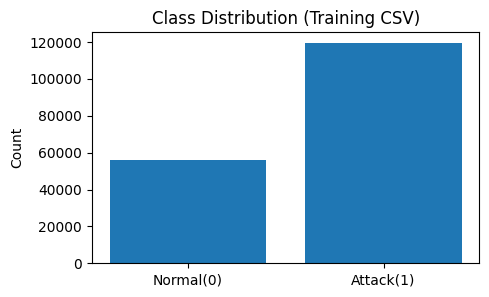

In [ ]:

# (a) Discover and Visualise the Data
df = pd.read_csv("UNSW_NB15_training-set.csv")

pd.set_option('display.max_columns', None)
df.head()

# Class distribution check (show imbalance early for IDS)
print("Full dataset class distribution:")
print(df["label"].value_counts())
print("\nPercentage distribution:")
print(df["label"].value_counts(normalize=True) * 100)

counts = df["label"].value_counts().sort_index()
plt.figure(figsize=(5,3))
plt.bar(["Normal(0)", "Attack(1)"], counts.values)
plt.title("Class Distribution (Training CSV)")
plt.ylabel("Count")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
df.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,175341.000000,175341.000000,175341,175341,175341,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341,175341.000000
unique,NaN,NaN,133,13,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,INT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,79946,94168,82275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56000,NaN
mean,87671.000000,1.359389,NaN,NaN,NaN,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,NaN,0.680622
std,50616.731112,6.480249,NaN,NaN,NaN,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,NaN,0.466237
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,43836.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,87671.000000,0.001582,NaN,NaN,NaN,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,131506.000000,0.668069,NaN,NaN,NaN,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065

In [ ]:
# (b) prepare the data for machine learning algorithms
# Identify missing data
df.isnull().sum()

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
# (b) prepare the data for machine learning algorithms
# Outlier identification using IQR method (IQR is more suitable as data is very skewed, avoid 3 sigma method)
# k = 1.5 DO NOT CHANGE

# Define the target onto new variable y
y = df['label']

# Define new variable with feature matrix without attack_cat or label
x = df.drop(columns=['label', 'attack_cat', 'id'])

# Select numerical features only as corr function can only be used on numerical features
numeric_df = x.select_dtypes(include=['int64', 'float64'])

# Outlier features should strictly be continuous values, dont include any other values
outlier_features = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate']

Q1 = numeric_df[outlier_features].quantile(0.25)
Q3 = numeric_df[outlier_features].quantile(0.75)
IQR = Q3 - Q1

outlier_counts = ((numeric_df[outlier_features] < (Q1 - 1.5 * IQR)) |
                  (numeric_df[outlier_features] > (Q3 + 1.5 * IQR))).sum()

outlier_counts


,0
dur,15741
spkts,24675
dpkts,20830
sbytes,22873
dbytes,28131
rate,17340


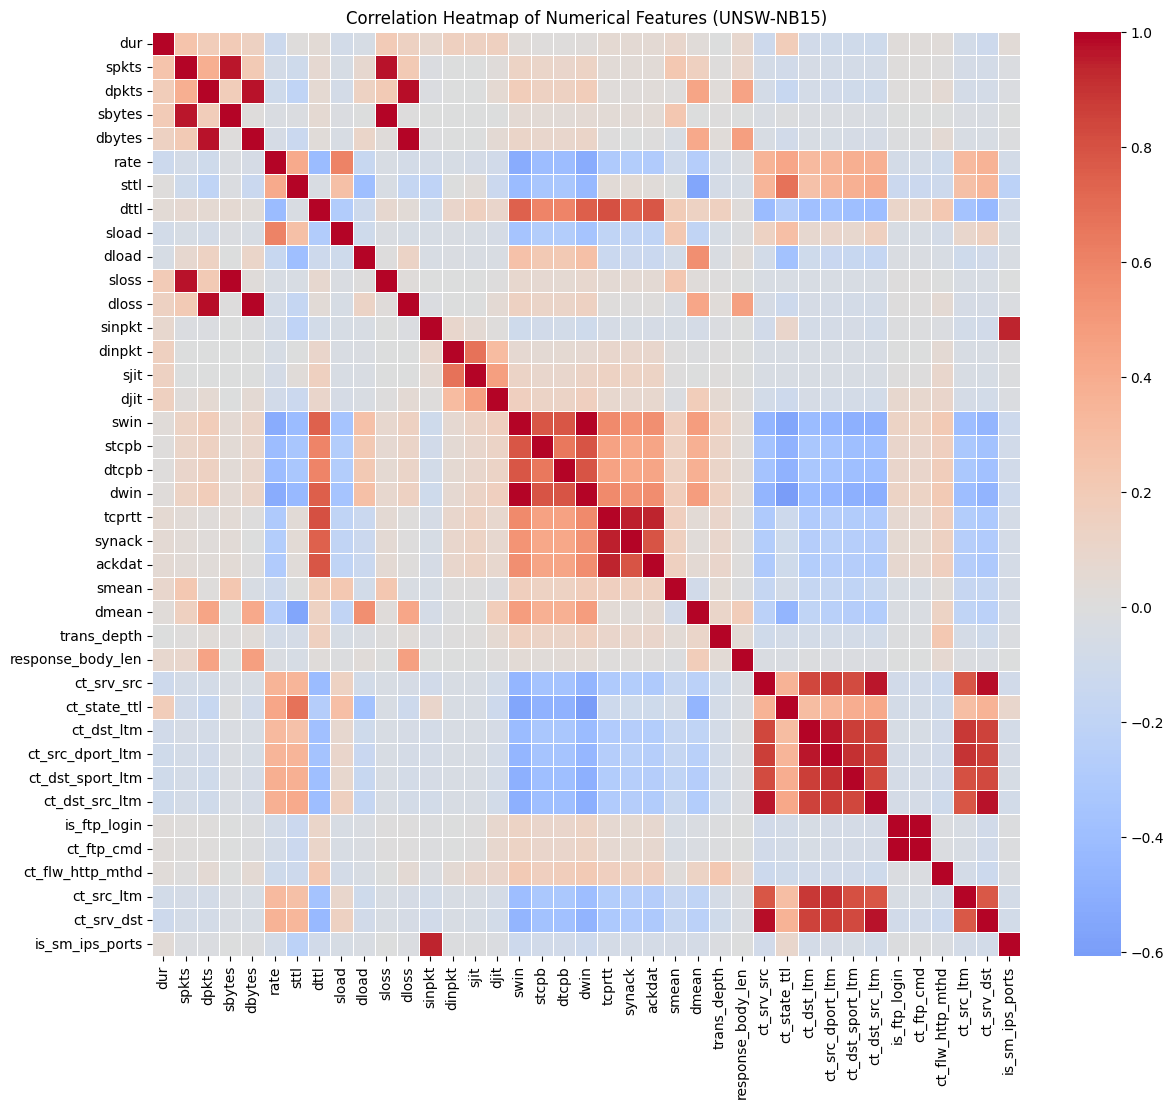

In [ ]:
# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features (UNSW-NB15)")
plt.show()

#Correlation showed groups of highly correlated features, especially traffice volume, TCP timing and connection count attributes
#No features were removed solely based on correlation

In [ ]:
# User defined transformer
class TrafficFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, use_new_features=True):
        self.use_new_features = use_new_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_out = X.copy()

        if not self.use_new_features:
            return X_out

        # Extract required columns
        dur = X_out["dur"].astype(float)
        spkts = X_out["spkts"].astype(float)
        dpkts = X_out["dpkts"].astype(float)
        sbytes = X_out["sbytes"].astype(float)
        dbytes = X_out["dbytes"].astype(float)

        total_pkts = spkts + dpkts
        total_bytes = sbytes + dbytes

        # New Features, packet rate, byte rate and bytes per packet, for each a constant is added to prevent zero divison error
        X_out["pkts_per_sec"] = total_pkts / (dur + 1e-6)
        X_out["bytes_per_sec"] = total_bytes / (dur + 1e-6)
        X_out["bytes_per_pkt"] = total_bytes / (total_pkts + 1.0)

        return X_out


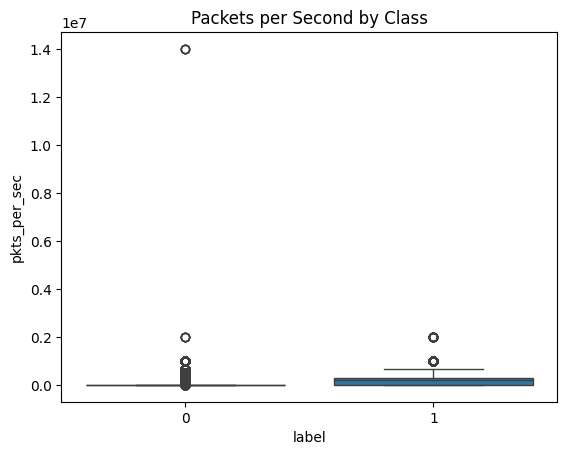

In [ ]:
df["pkts_per_sec"] = (df["spkts"] + df["dpkts"]) / (df["dur"] + 1e-6)
df["bytes_per_sec"] = (df["sbytes"] + df["dbytes"]) / (df["dur"] + 1e-6)
df["bytes_per_pkt"] = (df["sbytes"] + df["dbytes"]) / (df["spkts"] + df["dpkts"] + 1.0)

sns.boxplot(x="label", y="pkts_per_sec", data=df)
plt.title("Packets per Second by Class")
plt.show()


In [ ]:
# Toggle ON
adder_on = TrafficFeatureAdder(use_new_features=True)
x_on = adder_on.transform(x)

# Toggle OFF
adder_off = TrafficFeatureAdder(use_new_features=False)
x_off = adder_off.transform(x)

print("Original feature count:", x.shape[1])
print("With new features:", x_on.shape[1])
print("Without new features:", x_off.shape[1])

# Show the new columns exist
new_cols = ["pkts_per_sec", "bytes_per_sec", "bytes_per_pkt"]
print([c for c in new_cols if c in x_on.columns])

# Preview a few rows (include dur because it's used in the rate features)
x_on[["dur", "spkts", "dpkts", "sbytes", "dbytes", "pkts_per_sec", "bytes_per_sec", "bytes_per_pkt"]].head()


Original feature count: 42
With new features: 45
Without new features: 42
['pkts_per_sec', 'bytes_per_sec', 'bytes_per_pkt']


,dur,spkts,dpkts,sbytes,dbytes,pkts_per_sec,bytes_per_sec,bytes_per_pkt
0,0.121478,6,4,258,172,82.318755,3539.706451,39.090909
1,0.649902,14,38,734,42014,80.011940,65775.969645,806.566038
2,1.623129,8,16,364,13186,14.786246,8348.068239,542.000000
3,1.681642,12,12,628,770,14.271757,831.329836,55.920000
4,0.449454,10,6,534,268,35.598669,1784.383309,47.176471


In [ ]:
#Define categorical vs numeric columns

cat_cols = ["proto", "service", "state"]
num_cols = [c for c in x.columns if c not in cat_cols]

print("Categorical:", cat_cols)
print("Numeric count:", len(num_cols))


Categorical: ['proto', 'service', 'state']
Numeric count: 39


In [ ]:
#Build preprocessing pipeline
numeric_pipeline = Pipeline(steps=[
("feature_adder", TrafficFeatureAdder(use_new_features=True)),
("imputer", SimpleImputer(strategy="median")),
("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
("imputer", SimpleImputer(strategy="most_frequent")),
("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
transformers=[
("num", numeric_pipeline, num_cols),
("cat", categorical_pipeline, cat_cols),
],
remainder="drop"
)


In [ ]:
#Before split

print("Full dataset class distribution:")
print(y.value_counts())
print("\nPercentage distribution:")
print(y.value_counts(normalize=True) * 100)


Full dataset class distribution:
label
1    119341
0     56000
Name: count, dtype: int64

Percentage distribution:
label
1    68.062233
0    31.937767
Name: proportion, dtype: float64


In [ ]:
#Train/validation split

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_val.shape)


(140272, 42) (35069, 42)


In [ ]:
#After Split

print("\nTraining set class distribution:")
print(y_train.value_counts())
print("\nTraining set percentage:")
print(y_train.value_counts(normalize=True) * 100)

print("\nValidation set class distribution:")
print(y_val.value_counts())
print("\nValidation set percentage:")
print(y_val.value_counts(normalize=True) * 100)




Training set class distribution:
label
1    95472
0    44800
Name: count, dtype: int64

Training set percentage:
label
1    68.062051
0    31.937949
Name: proportion, dtype: float64

Validation set class distribution:
label
1    23869
0    11200
Name: count, dtype: int64

Validation set percentage:
label
1    68.062962
0    31.937038
Name: proportion, dtype: float64


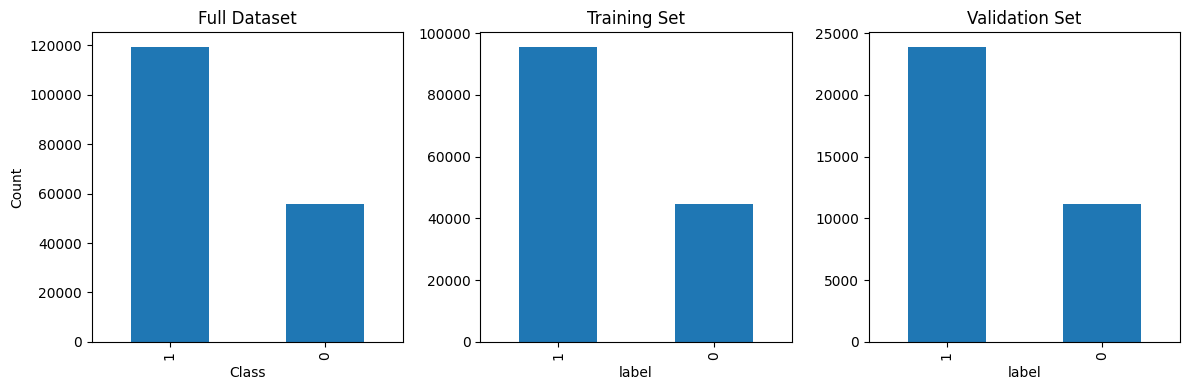

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Full dataset
plt.subplot(1,3,1)
y.value_counts().plot(kind='bar')
plt.title("Full Dataset")
plt.xlabel("Class")
plt.ylabel("Count")

# Training set
plt.subplot(1,3,2)
y_train.value_counts().plot(kind='bar')
plt.title("Training Set")

# Validation set
plt.subplot(1,3,3)
y_val.value_counts().plot(kind='bar')
plt.title("Validation Set")

plt.tight_layout()
plt.show()


In [ ]:
#3 model pipelines
pipe_lr = Pipeline(steps=[
("preprocess", preprocessor),
("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

pipe_rf = Pipeline(steps=[
("preprocess", preprocessor),
("model", RandomForestClassifier(
n_estimators=100,
random_state=42,
n_jobs=-1,
class_weight="balanced_subsample"
))
])

pipe_svm = Pipeline(steps=[
("preprocess", preprocessor),
("model", LinearSVC(class_weight="balanced"))
])

pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
pipe_svm.fit(X_train, y_train)

def eval_model(name, model):
    pred = model.predict(X_val)
    print("\n=== {} ===".format(name))
    print(classification_report(y_val, pred, digits=4))
    cm = confusion_matrix(y_val, pred)
    print("Confusion matrix:\n", cm)

    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    tpr = tp / (tp + fn) #Recall for Attack (1)
    fpr = fp / (fp + tn)

    #Compute AUC
    if hasattr(model.named_steps["model"], "predict_proba"):
        probs = model.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, probs)
    elif hasattr(model.named_steps["model"], "decision_function"):
        scores = model.decision_function(X_val)
        auc = roc_auc_score(y_val, scores)
    else:
        auc = None

    print("\nIDS Metrics:")
    print("Accuracy:", accuracy)
    print("TPR(Recall for Attack=1):", tpr)
    print("FPR(False alarm rate):", fpr)
    print("AUC-ROC:", auc)


eval_model("Logistic Regression", pipe_lr)
eval_model("Random Forest", pipe_rf)
eval_model("Linear SVM", pipe_svm)



=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.8945    0.8936    0.8941     11200
           1     0.9501    0.9506    0.9503     23869

    accuracy                         0.9324     35069
   macro avg     0.9223    0.9221    0.9222     35069
weighted avg     0.9323    0.9324    0.9324     35069

Confusion matrix:
 [[10008  1192]
 [ 1180 22689]]

IDS Metrics:
Accuracy: 0.9323619150816961
TPR(Recall for Attack=1): 0.9505634923959948
FPR(False alarm rate): 0.10642857142857143
AUC-ROC: 0.9844521697300145

=== Random Forest ===
              precision    recall  f1-score   support

           0     0.9500    0.9196    0.9345     11200
           1     0.9628    0.9773    0.9700     23869

    accuracy                         0.9589     35069
   macro avg     0.9564    0.9484    0.9523     35069
weighted avg     0.9587    0.9589    0.9587     35069

Confusion matrix:
 [[10299   901]
 [  542 23327]]

IDS Metrics:
Accuracy: 0.958852547

In [ ]:
# (d) Fine-tuning with GridSearchCV (MUST tune use_new_features)
toggle_param = "preprocess__num__feature_adder__use_new_features"

param_grid_lr = {
toggle_param: [True, False],
"model__C": [0.1, 1, 10],
"model__penalty": ["l2"],
"model__solver": ["lbfgs"],
"model__class_weight": [None, "balanced"]
}

param_grid_rf = {
toggle_param: [True, False],
"model__n_estimators": [100],
"model__max_depth": [None, 20],
"model__min_samples_split": [2],
"model__min_samples_leaf": [1, 5],
"model__class_weight": [None, "balanced_subsample"]
}

param_grid_svm = {
toggle_param: [True, False],
"model__C": [0.1, 1, 10],
"model__class_weight": [None, "balanced"]
}

scoring="balanced_accuracy"

gs_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=2, scoring=scoring, n_jobs=-1, verbose=1)
gs_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=2, scoring=scoring, n_jobs=-1, verbose=1)
gs_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=2, scoring=scoring, n_jobs=-1, verbose=1)

gs_lr.fit(X_train, y_train)
gs_rf.fit(X_train, y_train)
gs_svm.fit(X_train, y_train)

def show_gs_results(name, gs):
    print("\n==== {} (BEST) ====".format(name))
    print("Best CV score:", gs.best_score_)
    print("Best Params:", gs.best_params_)

    model = gs.best_estimator_
    pred = model.predict(X_val)

    #Compute AUC
    if hasattr(model.named_steps["model"], "predict_proba"):
        probs = model.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, probs)
    elif hasattr(model.named_steps["model"], "decision_function"):
        scores = model.decision_function(X_val)
        auc = roc_auc_score(y_val, scores)
    else:
        auc = None

    print("\nValidation report:")
    print(classification_report(y_val, pred, digits=4))

    cm = confusion_matrix(y_val, pred)
    print("Confusion matrix:\n", cm)

    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    tpr = tp / (tp + fn) #Recall for Attack (1)
    fpr = fp / (fp + tn)

    print("\nIDS Metrics:")
    print("Accuracy:", accuracy)
    print("TPR(Recall for Attack=1):", tpr)
    print("FPR(False alarm rate):", fpr)
    print("AUC-ROC:", auc)


show_gs_results("Logistic Regression", gs_lr)
show_gs_results("Random Forest", gs_rf)
show_gs_results("Linear SVM", gs_svm)

all_gs = [("LR", gs_lr), ("RF", gs_rf), ("SVM", gs_svm)]
best_name, best_gs = max(all_gs, key=lambda x: x[1].best_score_)
best_model = best_gs.best_estimator_

print("\n>>> Overall best by CV score:", best_name, "score=", best_gs.best_score_)

# (e) Final evaluation on the PROVIDED TEST SET
test_df = pd.read_csv("UNSW_NB15_testing-set.csv")
y_test = test_df["label"]
X_test = test_df.drop(columns=["label", "attack_cat", "id"])

test_pred = best_model.predict(X_test)

#Compute Test AUC
if hasattr(best_model.named_steps["model"], "predict_proba"):
    probs = best_model.predict_proba(X_test)[:,1]
    test_auc = roc_auc_score(y_test, probs)
elif hasattr(best_model.named_steps["model"], "decision_function"):
    scores = best_model.decision_function(X_test)
    test_auc = roc_auc_score(y_test, scores)
else:
    test_auc = None


print("\n==== FINAL TEST RESULTS (Best Model: {}) ====".format(best_name))
print(classification_report(y_test, test_pred, digits=4))

cm_test = confusion_matrix(y_test, test_pred)
print("Confusion matrix:\n", cm_test)

tn, fp, fn, tp = cm_test.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
tpr = tp / (tp + fn) #Recall for Attack (1)
fpr = fp / (fp + tn)

print("\nIDS Metrics:")
print("Accuracy:", accuracy)
print("TPR(Recall for Attack=1):", tpr)
print("FPR(False alarm rate):", fpr)
print("AUC-ROC:", test_auc)




Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits

==== Logistic Regression (BEST) ====
Best CV score: 0.9221842866420072
Best Params: {'model__C': 10, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'lbfgs', 'preprocess__num__feature_adder__use_new_features': True}

Validation report:
              precision    recall  f1-score   support

           0     0.8923    0.8960    0.8941     11200
           1     0.9511    0.9493    0.9502     23869

    accuracy                         0.9322     35069
   macro avg     0.9217    0.9226    0.9222     35069
weighted avg     0.9323    0.9322    0.9323     35069

Confusion matrix:
 [[10035  1165]
 [ 1211 22658]]

IDS Metrics:
Accuracy: 0.9322478542302318
TPR(Recall for Attack=1): 0.949264736687754
FPR(False alarm rate): 0.10401785714285715
AUC-ROC: 0.9844801498357104

==== Random Fore

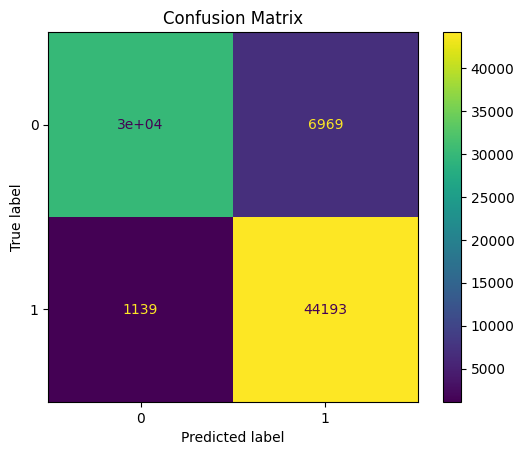

In [ ]:

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()
